## Previsão de Preços de Criptomoedas

Este projeto demonstra a construção e avaliação de um modelo de previsão de preços de quatro criptomoedas (Bitcoin, Tether, Litecoin e Ripple) utilizando a biblioteca XGBoost. O XGBoost é um algoritmo de aprendizado de máquina de última geração que tem se destacado por sua eficiência e precisão em diversas tarefas de previsão.

**Objetivos:**

* Construir um modelo de previsão de preços de criptomoedas com XGBoost.
* Avaliar o desempenho do modelo em dados de teste.
* Visualizar e analisar os resultados das previsões.
* Identificar os desafios e oportunidades na previsão de preços de criptomoedas.

**Metodologia:**

1. **Obtenção de dados:** coleta de dados históricos de preço das criptomoedas selecionadas.
2. **Pré-processamento de dados:** tratamento de valores faltantes, criação de features adicionais e normalização dos dados.
3. **Divisão dos dados:** divisão dos dados em conjuntos de treino e teste.
4. **Treinamento do modelo XGBoost:** ajuste dos parâmetros do modelo e treinamento com os dados de treino.
5. **Previsão de preços:** utilização do modelo treinado para prever os preços das criptomoedas no conjunto de teste.
6. **Avaliação do desempenho:** análise das métricas de desempenho do modelo, como RMSE, MAE, R² e acurácia.
7. **Visualização e análise dos resultados:** criação de gráficos e tabelas para visualizar as previsões e o desempenho do modelo.
8. **Discussão dos resultados:** interpretação dos resultados e identificação dos desafios e oportunidades na previsão de preços de criptomoedas.

**Resultados Esperados:**

* Um modelo de XGBoost treinado para prever os preços das quatro criptomoedas.
* Métricas de desempenho que indiquem a acurácia das previsões.
* Visualizações que facilitem a compreensão dos resultados.
* Discussão dos desafios e oportunidades na previsão de preços de criptomoedas.

**Benefícios:**

* Maior capacidade de tomar decisões inteligentes no mercado de criptomoedas.
* Melhor compreensão da dinâmica dos preços das criptomoedas.
* Identificação de oportunidades de investimento e diversificação de portfólios.

## 1. Preparação e Exploração dos Dados

### Importando as Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import yfinance as yf

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns 
import matplotlib.pyplot as plt

from numpy import array
from xgboost import XGBRegressor
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

### Coleta de Dados

In [2]:
# Lista de tickers das criptomoedas
tickers = ['BTC-USD', 'USDT-USD', 'XRP-USD', 'LTC-USD']

# Função para baixar os dados históricos de cada criptomoeda
def baixar_dados(tickers):
    for ticker in tickers:
        data = yf.download(ticker, start="2018-01-01", end=dt.datetime.now().strftime("%Y-%m-%d"))
        data.to_csv(f"{ticker}.csv")

# Chamando a função para baixar os dados
baixar_dados(tickers)

# Lista de nomes dos arquivos CSV
arquivos = ['BTC-USD.csv', 'USDT-USD.csv', 'XRP-USD.csv', 'LTC-USD.csv']

# Dicionário para armazenar os DataFrames
dfs = {}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Loop para ler os arquivos CSV e armazenar os DataFrames
for arquivo in arquivos:
    # Lê o arquivo CSV e armazena em um DataFrame com o nome do arquivo como chave
    dfs[arquivo.split('.')[0]] = pd.read_csv(arquivo)

# Acessando aos DataFrames
bitcoindf = dfs['BTC-USD']
tetherdf = dfs['USDT-USD']
rippledf = dfs['XRP-USD']
litecoindf = dfs['LTC-USD']

### Verificando os Dados

In [4]:
# Verificando valores ausentes em cada DataFrame
for nome_df, df in dfs.items():
    # Verificando valores ausentes e somando por coluna
    valores_ausentes = df.isnull().sum()
    print(f"Valores ausentes em {nome_df}:\n{valores_ausentes}\n")

# Convertendo colunas 'Date' para formato datetime em cada DataFrame
for df in [bitcoindf, tetherdf, litecoindf, rippledf]:
    df['Date'] = pd.to_datetime(df['Date'])

# Verificando se as colunas estão sendo convertidas corretamente
for nome_df, df in zip(['bitcoindf', 'tetherdf', 'litecoindf', 'rippledf'], [bitcoindf, tetherdf, litecoindf, rippledf]):
    print(f"Verificando tipo de dados da coluna 'Date' em {nome_df}: {df['Date'].dtype}")

Valores ausentes em BTC-USD:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Valores ausentes em USDT-USD:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Valores ausentes em XRP-USD:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Valores ausentes em LTC-USD:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Verificando tipo de dados da coluna 'Date' em bitcoindf: datetime64[ns]
Verificando tipo de dados da coluna 'Date' em tetherdf: datetime64[ns]
Verificando tipo de dados da coluna 'Date' em litecoindf: datetime64[ns]
Verificando tipo de dados da coluna 'Date' em rippledf: datetime64[ns]


In [5]:
bitcoindf.head()

Date          Open          High           Low         Close  \
0 2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
1 2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2 2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
3 2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
4 2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   

      Adj Close       Volume  
0  13657.200195  10291200000  
1  14982.099609  16846600192  
2  15201.000000  16871900160  
3  15599.200195  21783199744  
4  17429.500000  23840899072

In [6]:
tetherdf.tail()

Date      Open      High       Low     Close  Adj Close  \
2249 2024-02-28  1.000489  1.001576  0.999024  1.001061   1.001061   
2250 2024-02-29  1.001135  1.001234  0.998971  1.000402   1.000402   
2251 2024-03-01  1.000388  1.001421  0.999607  1.000678   1.000678   
2252 2024-03-02  1.000784  1.001447  0.999925  1.000606   1.000606   
2253 2024-03-03  1.000638  1.001058  0.999863  1.000451   1.000451   

            Volume  
2249  128007189181  
2250  111968615893  
2251   76389482142  
2252   67653795192  
2253   70762304723

In [7]:
litecoindf.head()

Date        Open        High         Low       Close   Adj Close  \
0 2018-01-01  231.666000  236.634003  222.203003  229.033005  229.033005   
1 2018-01-02  228.990005  263.625000  228.990005  255.684006  255.684006   
2 2018-01-03  255.695007  260.742004  243.134995  245.367996  245.367996   
3 2018-01-04  245.475006  245.475006  227.013000  241.369995  241.369995   
4 2018-01-05  241.033997  256.148010  237.880005  249.270996  249.270996   

       Volume  
0   633142016  
1  1237949952  
2  3215280128  
3  3481550080  
4  1710599936

In [8]:
rippledf.head()

Date     Open     High      Low    Close  Adj Close      Volume
0 2018-01-01  2.29602  2.39103  2.14897  2.39103    2.39103  1894230016
1 2018-01-02  2.36948  2.48919  2.24793  2.48090    2.48090  3171010048
2 2018-01-03  2.46410  3.27938  2.44315  3.10537    3.10537  6635879936
3 2018-01-04  3.11734  3.84194  3.11734  3.19663    3.19663  8103660032
4 2018-01-05  3.30081  3.56468  2.82561  3.04871    3.04871  6288500224

### Visualização dos Dados

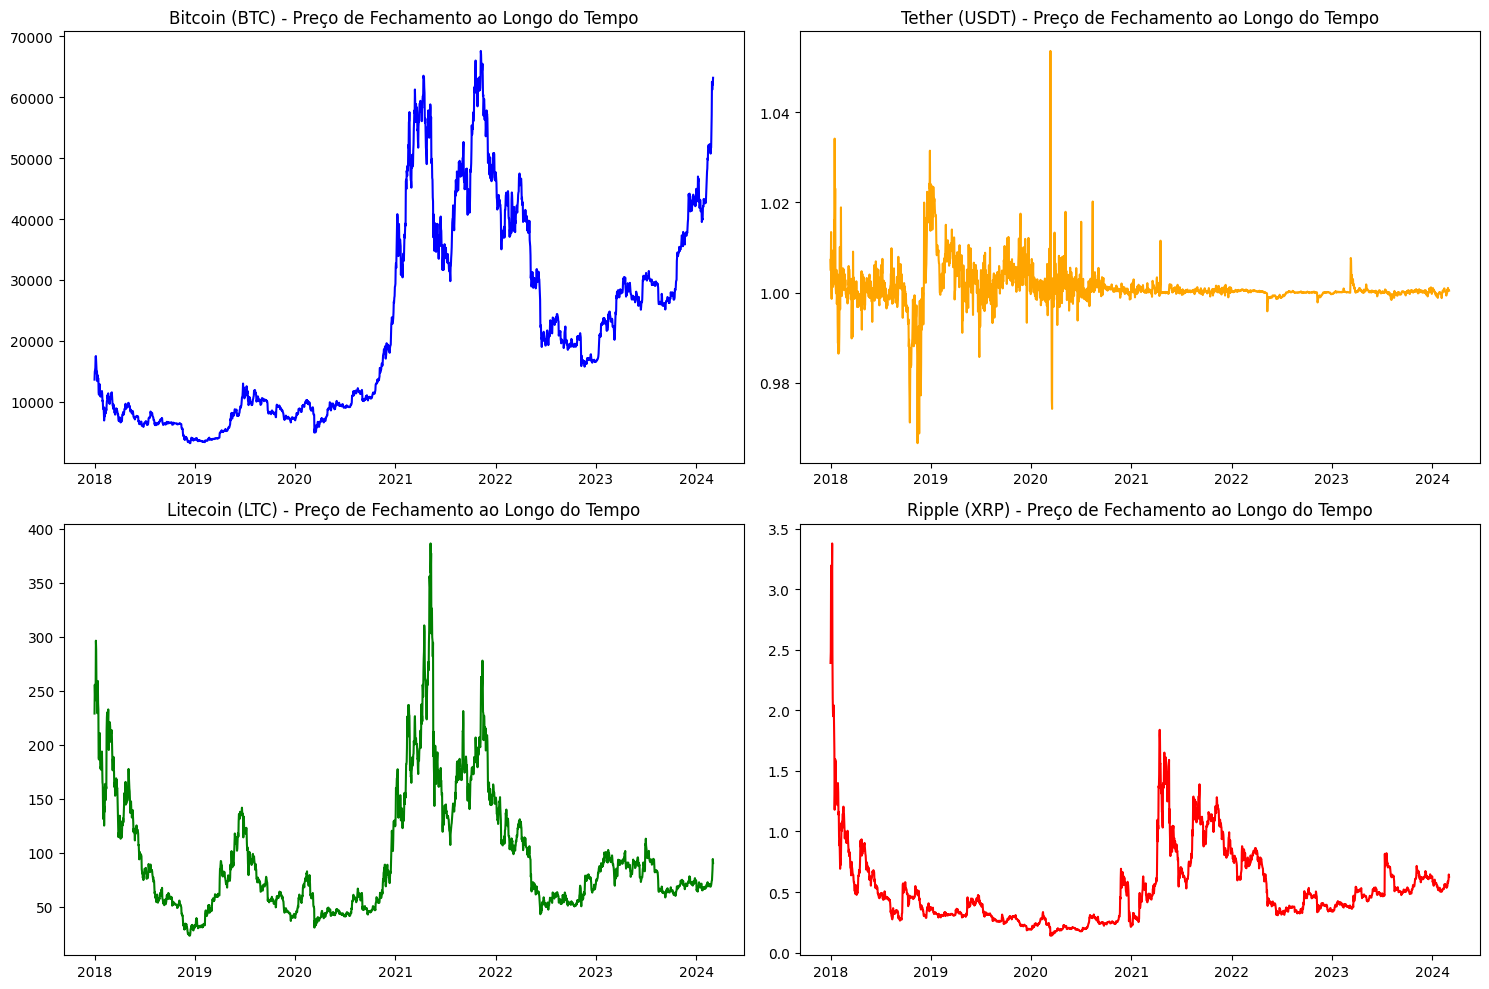

In [9]:
# Gráficos de Séries Temporais
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Bitcoin
axes[0, 0].plot(bitcoindf['Date'], bitcoindf['Close'], color='b')
axes[0, 0].set_title('Bitcoin (BTC) - Preço de Fechamento ao Longo do Tempo')

# Tether
axes[0, 1].plot(tetherdf['Date'], tetherdf['Close'], color='orange')
axes[0, 1].set_title('Tether (USDT) - Preço de Fechamento ao Longo do Tempo')

# Litecoin
axes[1, 0].plot(litecoindf['Date'], litecoindf['Close'], color='green')
axes[1, 0].set_title('Litecoin (LTC) - Preço de Fechamento ao Longo do Tempo')

# Ripple
axes[1, 1].plot(rippledf['Date'], rippledf['Close'], color='red')
axes[1, 1].set_title('Ripple (XRP) - Preço de Fechamento ao Longo do Tempo')

plt.tight_layout()
plt.show()

## 2. Pré-processamento dos Dados

### Analisado o Último Ano

In [10]:
# Obtendo a data atual
data_atual = datetime.now()

# Definindo o ano anterior com base na data atual
ano_anterior = data_atual - timedelta(days=365)

# Convertendo as datas para o formato 'MM-YYYY'
data_formatada = ano_anterior.strftime('%m-%Y')

# Selecionando os dados do último ano para cada criptomoeda
ultimo_ano_bitcoindf = bitcoindf[bitcoindf['Date'] > data_formatada]
ultimo_ano_tetherdf = tetherdf[tetherdf['Date'] > data_formatada]
ultimo_ano_rippledf = rippledf[rippledf['Date'] > data_formatada]
ultimo_ano_litecoindf = litecoindf[litecoindf['Date'] > data_formatada]

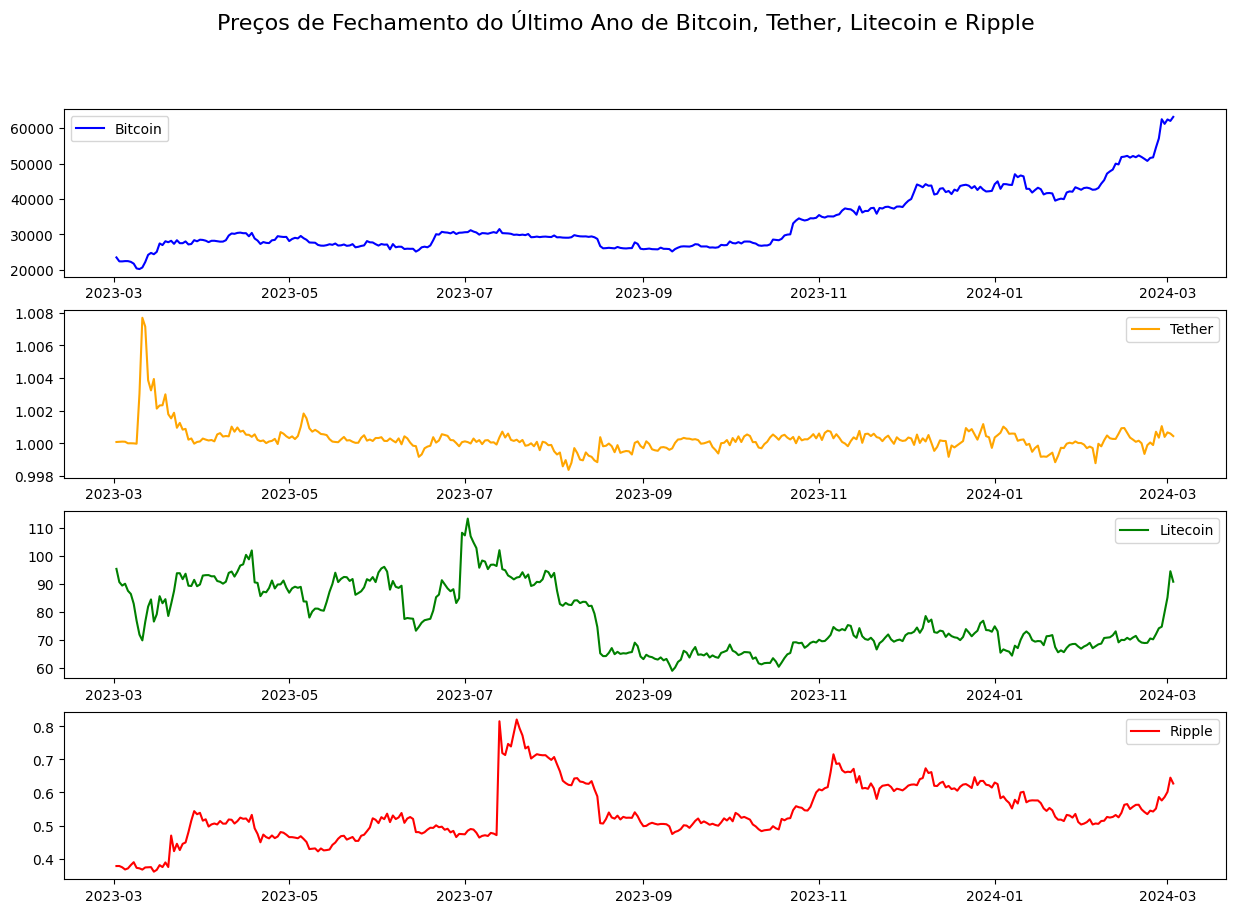

In [11]:
# Criando uma figura para o gráfico dos Preços de fechamento
fig = plt.figure(figsize=(15, 10))
# Título geral para os gráficos
fig.suptitle("Preços de Fechamento do Último Ano de Bitcoin, Tether, Litecoin e Ripple", fontsize=16)

# Bitcoin
plt.subplot(4, 1, 1)
plt.plot(ultimo_ano_bitcoindf['Date'], ultimo_ano_bitcoindf['Close'], color="b")
plt.legend(["Bitcoin"])

# Tether
plt.subplot(4, 1, 2)
plt.plot(ultimo_ano_tetherdf['Date'], ultimo_ano_tetherdf['Close'], color="orange")
plt.legend(["Tether"])

# Ripple
plt.subplot(4, 1, 4)
plt.plot(ultimo_ano_rippledf['Date'], ultimo_ano_rippledf['Close'], color="red")
plt.legend(["Ripple"])

# Litecoin
plt.subplot(4, 1, 3)
plt.plot(ultimo_ano_litecoindf['Date'], ultimo_ano_litecoindf['Close'], color="green")
plt.legend(["Litecoin"])

plt.show()

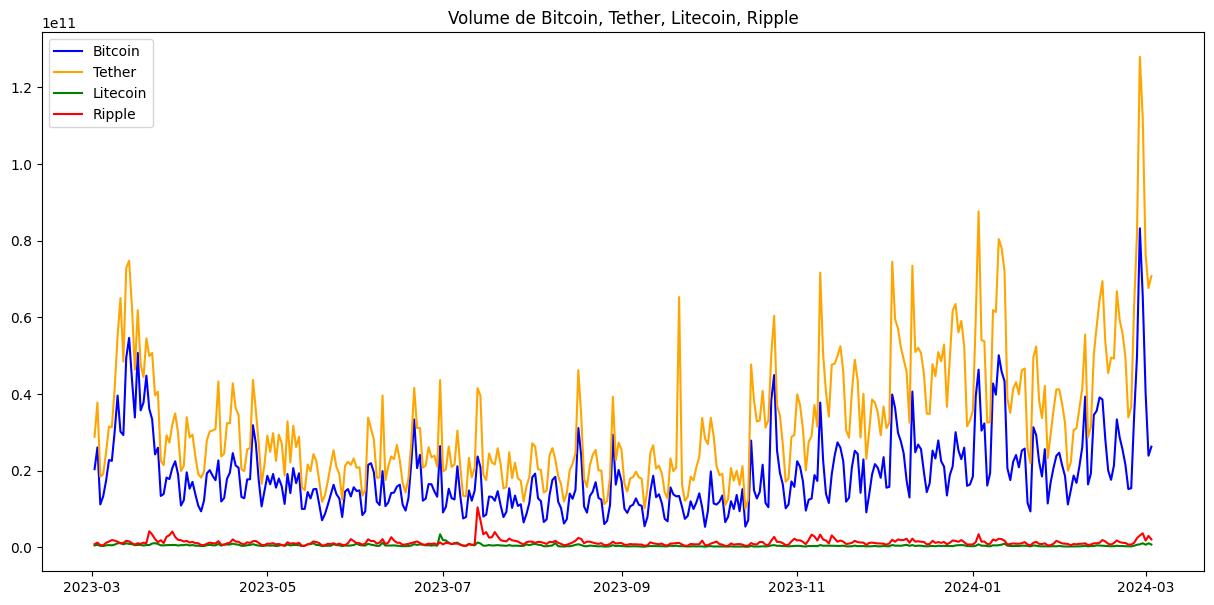

In [12]:
# Criando uma figura para o gráfico de Volume
fig = plt.figure(figsize=(15, 7))

# Plotando os volumes de negociação
plt.plot(ultimo_ano_bitcoindf['Date'], ultimo_ano_bitcoindf['Volume'], label='Bitcoin', color='b')
plt.plot(ultimo_ano_tetherdf['Date'], ultimo_ano_tetherdf['Volume'], label='Tether', color='orange')
plt.plot(ultimo_ano_litecoindf['Date'], ultimo_ano_litecoindf['Volume'], label='Litecoin', color='g')
plt.plot(ultimo_ano_rippledf['Date'], ultimo_ano_rippledf['Volume'], label='Ripple', color='r')

plt.title('Volume de Bitcoin, Tether, Litecoin, Ripple')
plt.legend(['Bitcoin', 'Tether', 'Litecoin', 'Ripple'])

plt.show()

### Selecionando e Visualizando o Último Mês de Dados

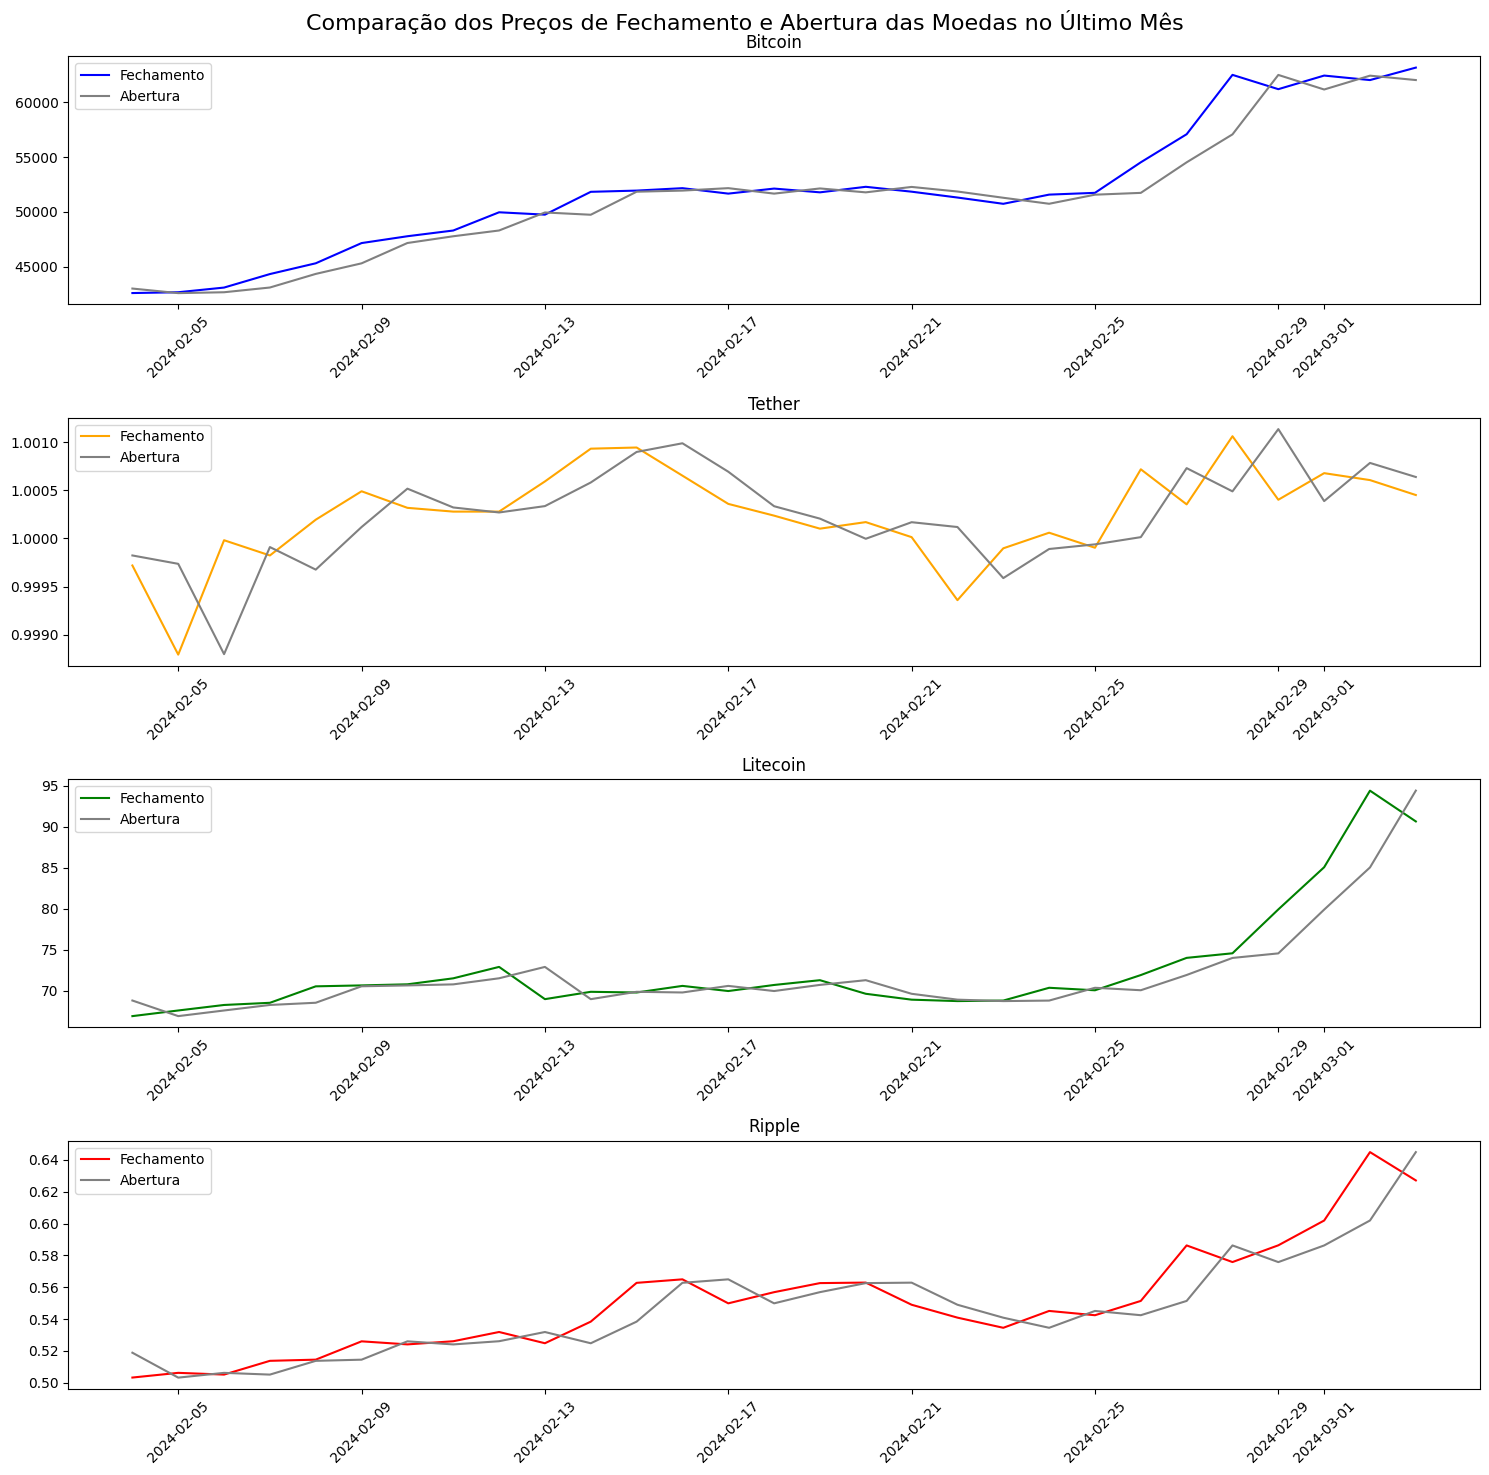

In [13]:
# Definindo a data do último mês
inicio_ultimo_mes = dt.datetime.now() - dt.timedelta(days=30)
inicio_ultimo_mes = inicio_ultimo_mes.strftime('%Y-%m-%d')

# Selecionando os dados do último mês para cada criptomoeda
ultimo_mes_bitcoin = bitcoindf[bitcoindf['Date'] > inicio_ultimo_mes]
ultimo_mes_tether = tetherdf[tetherdf['Date'] > inicio_ultimo_mes]
ultimo_mes_ripple = rippledf[rippledf['Date'] > inicio_ultimo_mes]
ultimo_mes_litecoin = litecoindf[litecoindf['Date'] > inicio_ultimo_mes]

# Plotando os gráficos de Comparação dos Preços de Fechamento e Abertura 
fig = plt.figure(figsize=(15, 15))
fig.suptitle("Comparação dos Preços de Fechamento e Abertura das Moedas no Último Mês", fontsize=16)
fig.tight_layout()

# Bitcoin
plt.subplot(4, 1, 1)
plt.plot(ultimo_mes_bitcoin['Date'], ultimo_mes_bitcoin['Close'], color='b')
plt.plot(ultimo_mes_bitcoin['Date'], ultimo_mes_bitcoin['Open'], color='grey')
plt.legend(["Fechamento", "Abertura"])
plt.title("Bitcoin")
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhorar a legibilidade
plt.tight_layout()

# Tether
plt.subplot(4, 1, 2)
plt.plot(ultimo_mes_tether['Date'], ultimo_mes_tether['Close'], color="orange")
plt.plot(ultimo_mes_tether['Date'], ultimo_mes_tether['Open'], color="grey")
plt.legend(["Fechamento", "Abertura"])
plt.title("Tether")
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhorar a legibilidade
plt.tight_layout()

# Litecoin
plt.subplot(4, 1, 3)
plt.plot(ultimo_mes_litecoin['Date'], ultimo_mes_litecoin['Close'], color="g")
plt.plot(ultimo_mes_litecoin['Date'], ultimo_mes_litecoin['Open'], color="grey")
plt.legend(["Fechamento", "Abertura"])
plt.title("Litecoin")
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhorar a legibilidade
plt.tight_layout()

# Ripple
plt.subplot(4, 1, 4)
plt.plot(ultimo_mes_ripple['Date'], ultimo_mes_ripple['Close'], color="r")
plt.plot(ultimo_mes_ripple['Date'], ultimo_mes_ripple['Open'], color="grey")
plt.legend(["Fechamento", "Abertura"])
plt.title("Ripple")
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhorar a legibilidade
plt.tight_layout()

plt.show()

### Análise Descritiva e Visualização

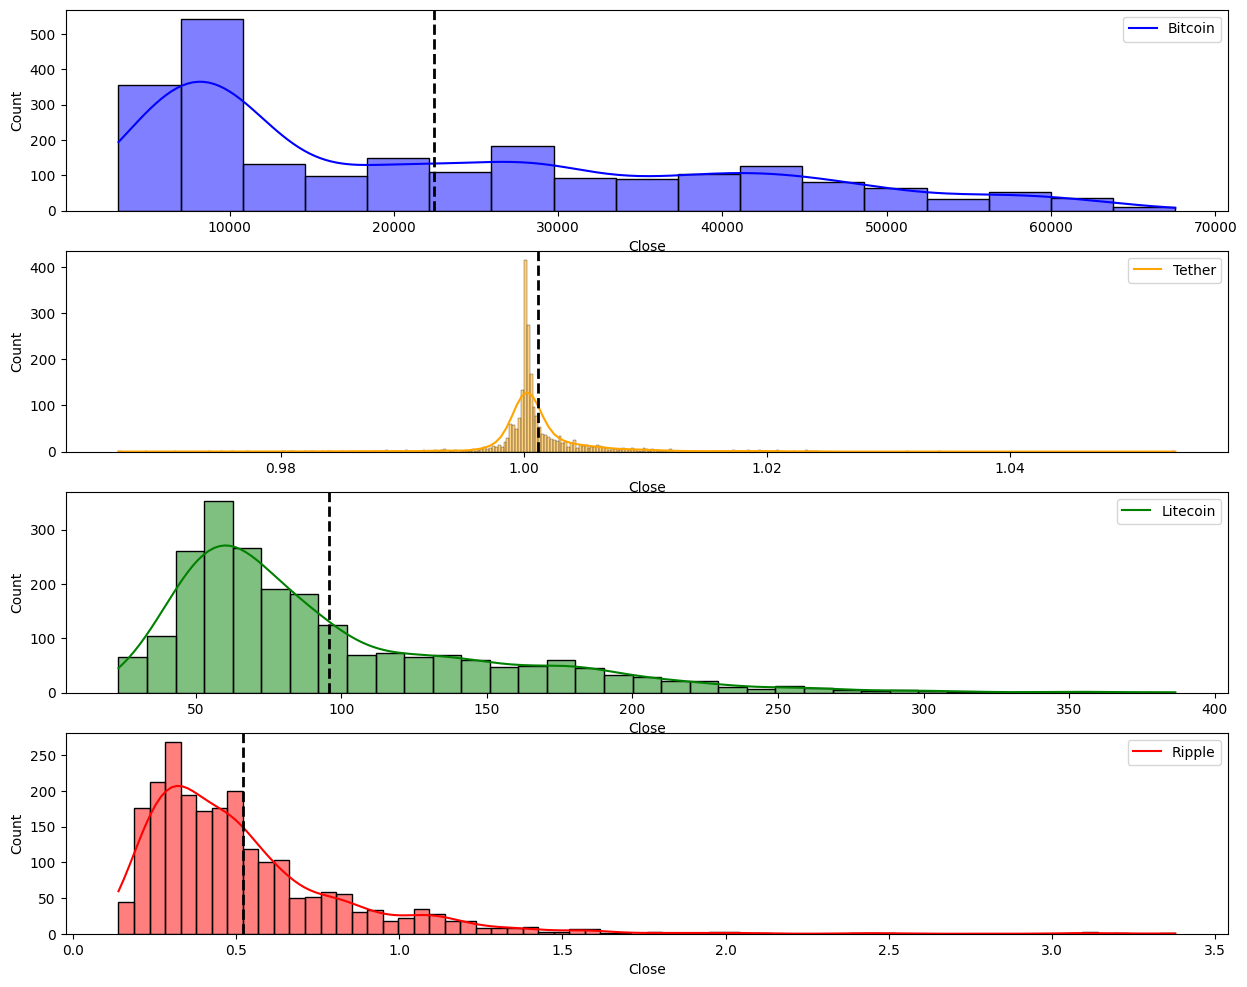

In [14]:
# Histogramas para os preços de fechamento
fig = plt.figure(figsize=(15, 12))
fig.tight_layout()

# Bitcoin
plt.subplot(4, 1, 1)
sns.histplot(bitcoindf['Close'], color='b', kde=True)
plt.axvline(bitcoindf['Close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.legend(['Bitcoin'], loc='upper right')

# Tether
plt.subplot(4, 1, 2)
sns.histplot(tetherdf['Close'], color='orange', kde=True)
plt.axvline(tetherdf['Close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.legend(['Tether'], loc='upper right')

# Litecoin
plt.subplot(4, 1, 3)
sns.histplot(litecoindf['Close'], color='g', kde=True)
plt.axvline(litecoindf['Close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.legend(['Litecoin'], loc='upper right')

# Ripple
plt.subplot(4, 1, 4)
sns.histplot(rippledf['Close'],color='r', kde=True)
plt.axvline(rippledf['Close'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.legend(['Ripple'], loc='upper right')

plt.show()

In [15]:
# Selecionando apenas as colunas de preços de fechamento de cada criptomoeda
prices_df = pd.concat([bitcoindf['Close'], tetherdf['Close'], litecoindf['Close'], rippledf['Close']], axis=1)
prices_df.columns = ['Bitcoin', 'Tether', 'Litecoin', 'Ripple']  # Renomeando as colunas

# Calculando a matriz de correlação entre os preços de fechamento das criptomoedas
correlation_matrix = prices_df.corr()
print("\nMatriz de Correlação:")
print(correlation_matrix)


Matriz de Correlação:
           Bitcoin    Tether  Litecoin    Ripple
Bitcoin   1.000000 -0.168861  0.616055  0.548779
Tether   -0.168861  1.000000 -0.081271 -0.076174
Litecoin  0.616055 -0.081271  1.000000  0.807464
Ripple    0.548779 -0.076174  0.807464  1.000000


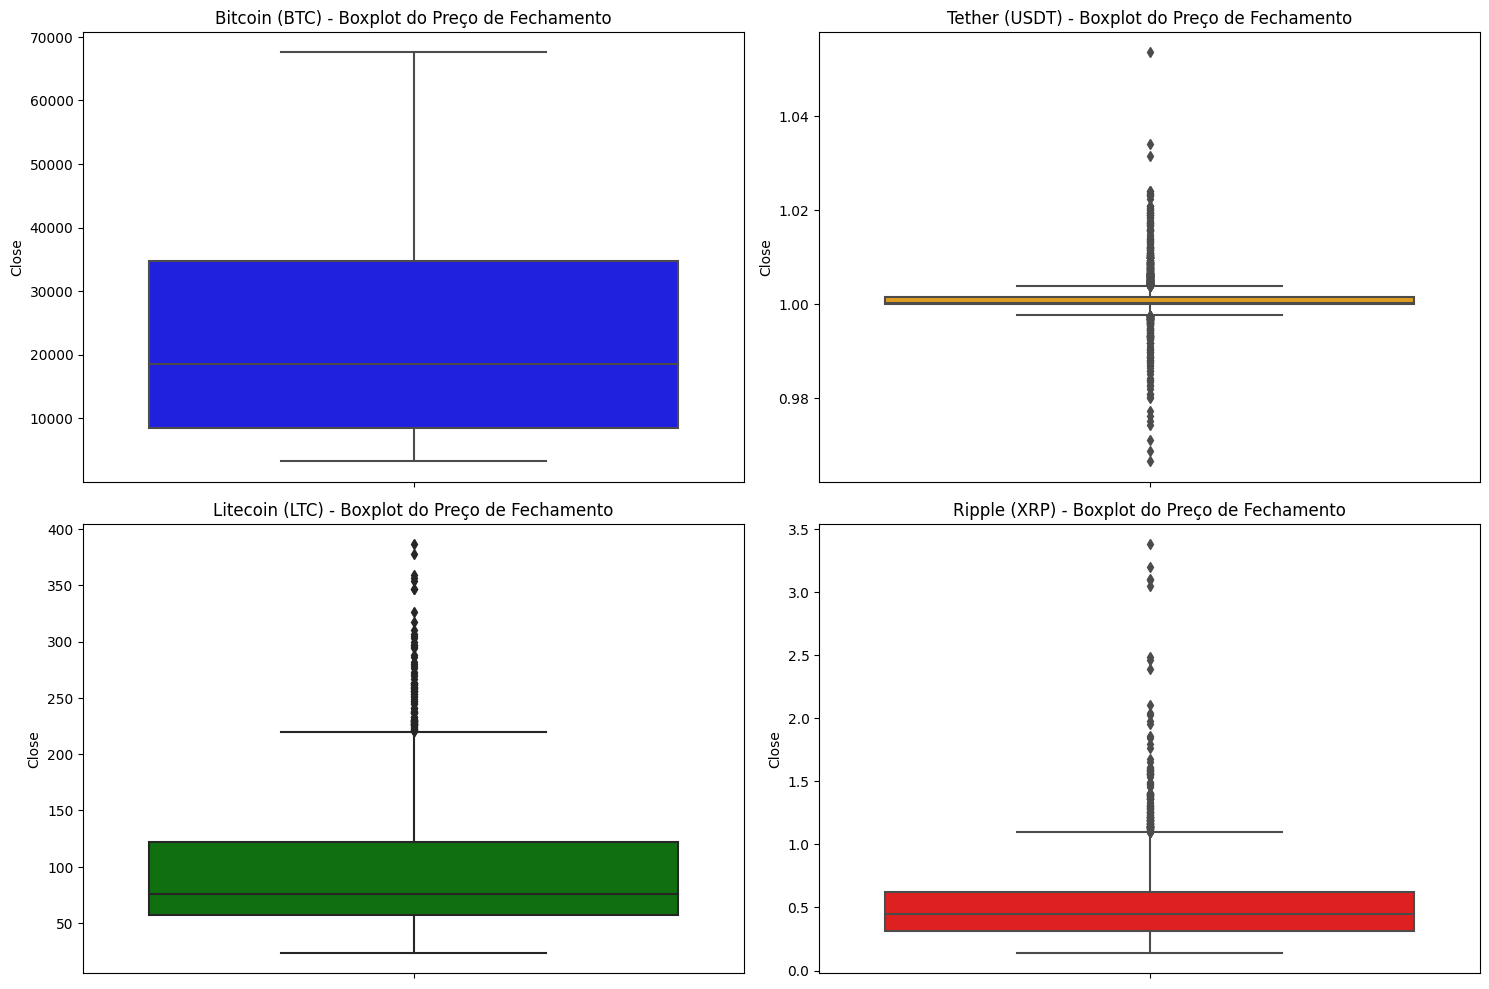

In [16]:
# Boxplots dos preços de fechamento
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Bitcoin
sns.boxplot(y=bitcoindf['Close'], ax=axes[0, 0], color='b')
axes[0, 0].set_title('Bitcoin (BTC) - Boxplot do Preço de Fechamento')

# Tether
sns.boxplot(y=tetherdf['Close'], ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Tether (USDT) - Boxplot do Preço de Fechamento')

# Litecoin
sns.boxplot(y=litecoindf['Close'], ax=axes[1, 0], color='green')
axes[1, 0].set_title('Litecoin (LTC) - Boxplot do Preço de Fechamento')

# Ripple
sns.boxplot(y=rippledf['Close'], ax=axes[1, 1], color='red')
axes[1, 1].set_title('Ripple (XRP) - Boxplot do Preço de Fechamento')

# Ajustes de layout
plt.tight_layout()
plt.show()

## 3. Engenharia de Recursos

### Criando Médias Móveis

In [17]:
# Definindo as médias móveis de 50 e 200 dias para cada criptomoeda
for df in [bitcoindf, tetherdf, rippledf, litecoindf]:
    df['MA50'] = df['Close'].rolling(window=50).mean()
    df['MA200'] = df['Close'].rolling(window=200).mean()

### Visualizando as Médias Móveis

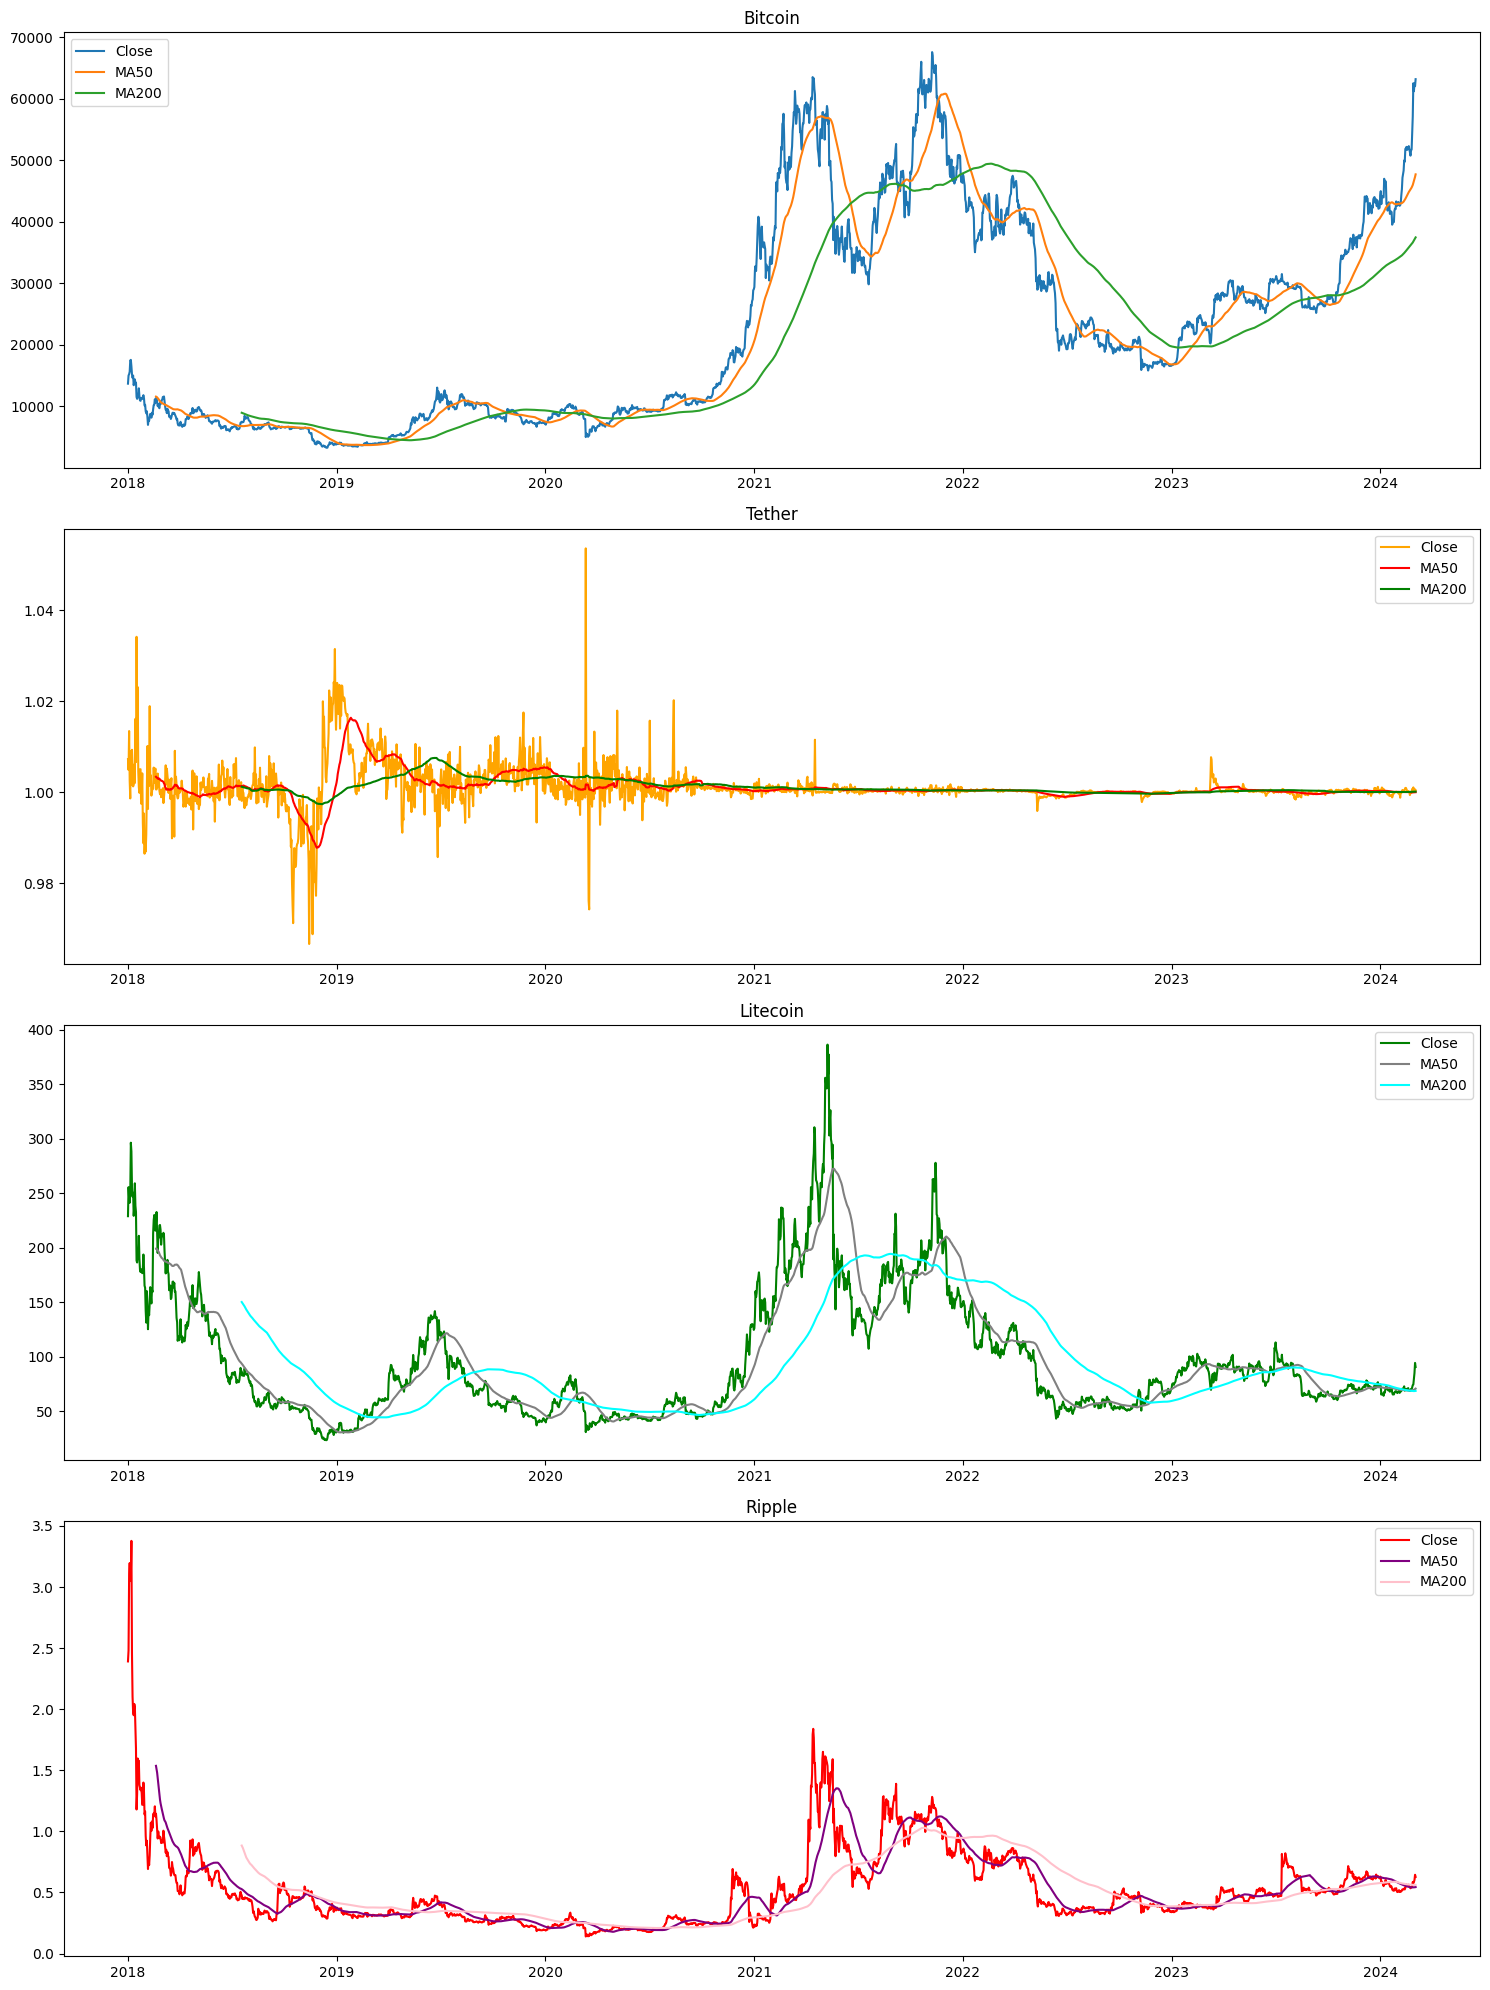

In [18]:
# Plotando os gráficos separados por moeda
fig, axs = plt.subplots(4, 1, figsize=(15, 20))

# Bitcoin
axs[0].plot(bitcoindf['Date'], bitcoindf['Close'], label='Close')
axs[0].plot(bitcoindf['Date'], bitcoindf['MA50'], label='MA50')
axs[0].plot(bitcoindf['Date'], bitcoindf['MA200'], label='MA200')
axs[0].set_title('Bitcoin')
axs[0].legend()

# Tether
axs[1].plot(tetherdf['Date'], tetherdf['Close'], label='Close', color='orange')
axs[1].plot(tetherdf['Date'], tetherdf['MA50'], label='MA50', color='red')
axs[1].plot(tetherdf['Date'], tetherdf['MA200'], label='MA200', color='green')
axs[1].set_title('Tether')
axs[1].legend()

# Litecoin
axs[2].plot(litecoindf['Date'], litecoindf['Close'], label='Close', color='g')
axs[2].plot(litecoindf['Date'], litecoindf['MA50'], label='MA50', color='gray')
axs[2].plot(litecoindf['Date'], litecoindf['MA200'], label='MA200', color='cyan')
axs[2].set_title('Litecoin')
axs[2].legend()

# Ripple
axs[3].plot(rippledf['Date'], rippledf['Close'], label='Close', color='r')
axs[3].plot(rippledf['Date'], rippledf['MA50'], label='MA50', color='purple')
axs[3].plot(rippledf['Date'], rippledf['MA200'], label='MA200', color='pink')
axs[3].set_title('Ripple')
axs[3].legend()

plt.tight_layout()
plt.show()

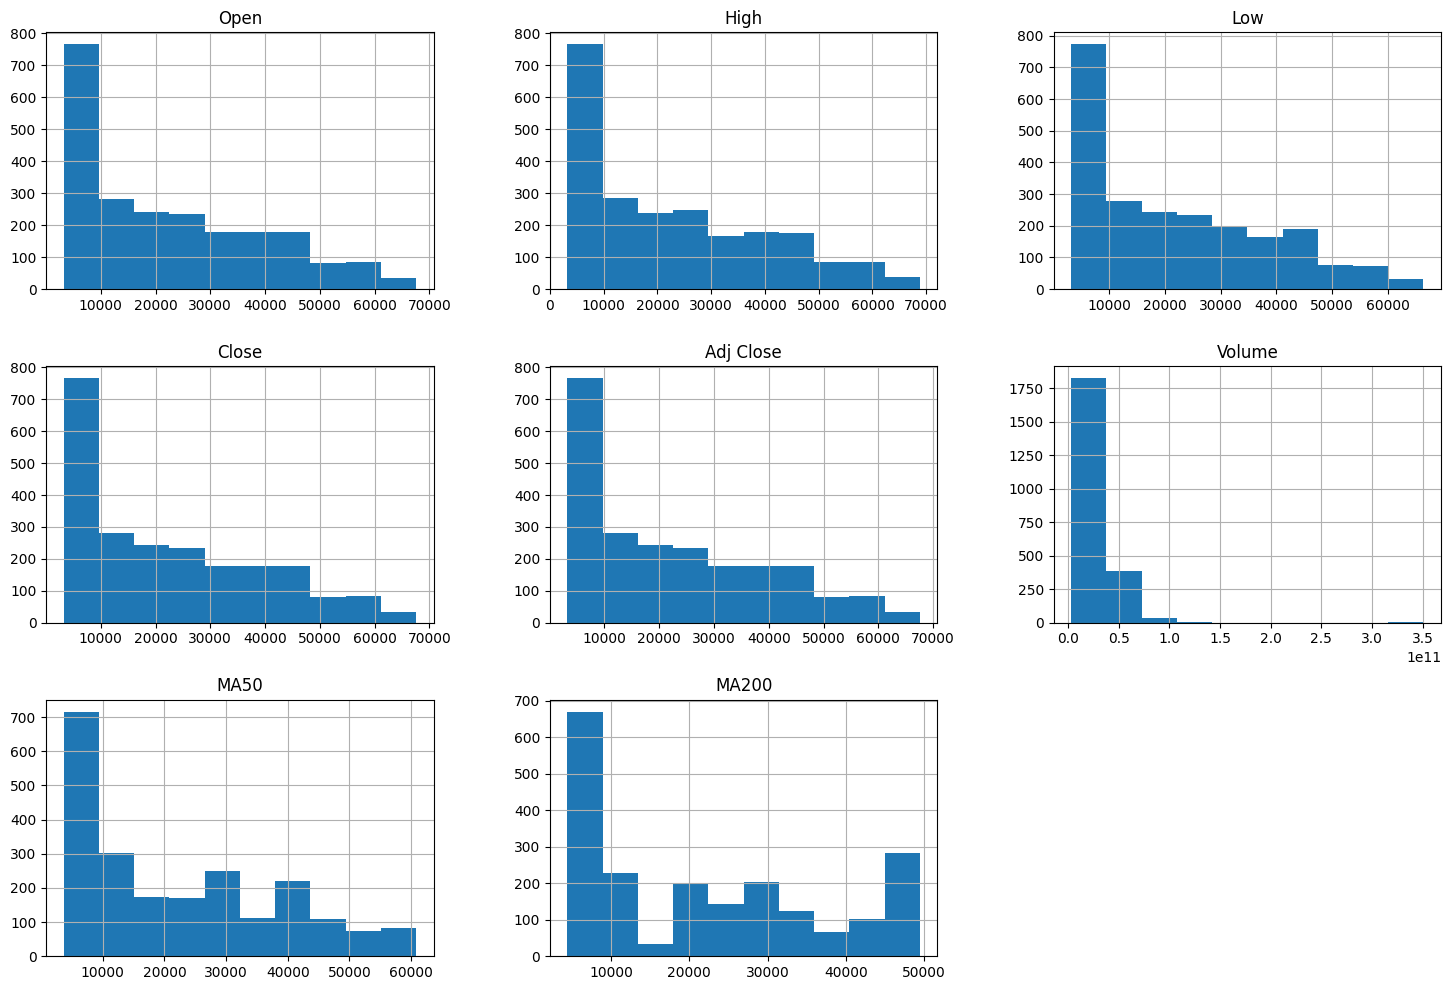

In [19]:
# Criando um histograma para os dados do Bitcoin
bitcoin_numeric = bitcoindf.select_dtypes(exclude=["bool", "datetime64"])
bitcoin_numeric.hist(figsize=(18, 12))
plt.show()

## 4. Modelagem e Previsão

### Preparando os Dados para o Modelo

In [20]:
# Selecionando apenas as colunas 'Date' e 'Close' do DataFrame Bitcoin
closedf = bitcoindf[['Date','Close']]
print("Formato do DataFrame de fechamento:", closedf.shape)

# Filtrando apenas as entradas do DataFrame onde a data é posterior a '2020-09-13'
closedf = closedf[closedf['Date'] > '2020-09-13']

# Criando uma cópia do DataFrame filtrado para análise posterior
close_stock = closedf.copy()
print("Total de dados para previsão:",closedf.shape[0])

# Removendo a coluna 'Date' do DataFrame closedf, pois ela não será utilizada na normalização
del closedf['Date']

# Normalizando os dados utilizando o MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
closedf = scaler.fit_transform(np.array(closedf).reshape(-1, 1))
print(closedf.shape)

Formato do DataFrame de fechamento: (2254, 2)
Total de dados para previsão: 1267
(1267, 1)


In [21]:
# Dividindo os dados em conjuntos de treinamento e teste
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size

train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (886, 1)
test_data:  (381, 1)


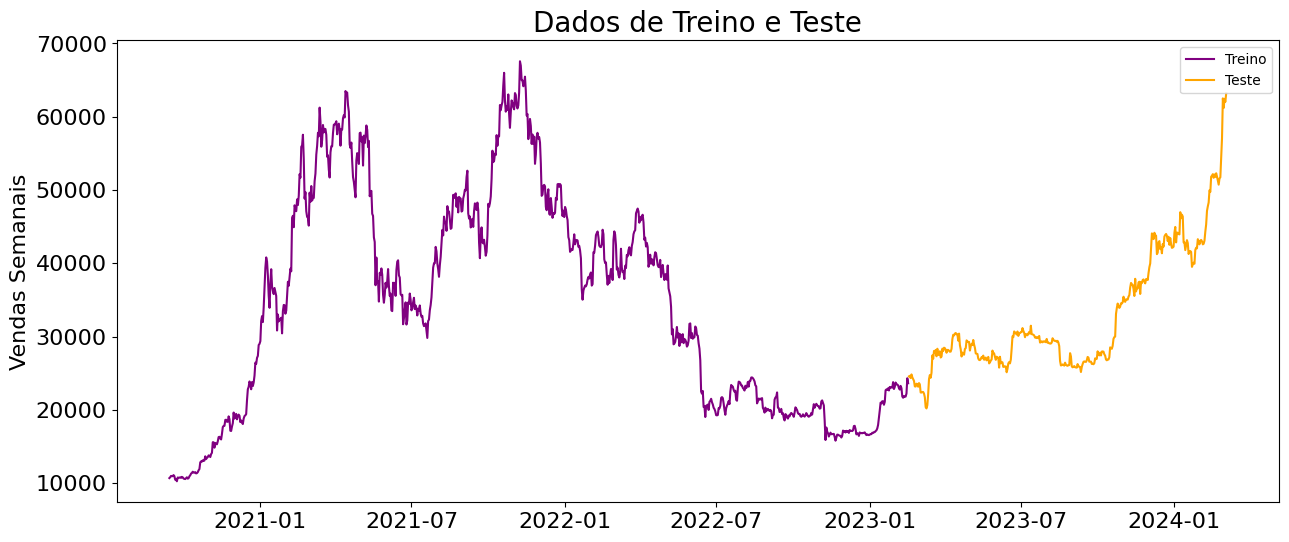

In [22]:
# Vizualizando a divisão
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x=close_stock['Date'][:len(train_data)], y=close_stock['Close'][:len(train_data)], color='purple', label='Treino')
sns.lineplot(x=close_stock['Date'][len(train_data):], y=close_stock['Close'][len(train_data):], color='orange', label='Teste')

ax.set_title('Dados de Treino e Teste', fontsize=20, loc='center')
ax.set_xlabel('', fontsize=16)
ax.set_ylabel('Vendas Semanais', fontsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right');

In [23]:
# Função para criar conjuntos de dados de entrada e saída para o modelo de previsão
def criar_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 15

# Criando conjuntos de treinamento e teste com a função definida
X_train, y_train = criar_dataset(train_data, time_step)
X_test, y_test = criar_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (870, 15)
y_train:  (870,)
X_test:  (365, 15)
y_test (365,)


### Treinando o Modelo

In [24]:
# Definindo o modelo XGBRegressor
modelo = XGBRegressor(
    base_score=0.5,  # Pontuação base para todos os exemplos
    booster='gbtree',  # Tipo de modelo que será treinado
    colsample_bylevel=1,  # Proporção de amostras de coluna usadas em cada nível
    colsample_bynode=1,  # Proporção de amostras de coluna usadas para cada nó ao dividir
    colsample_bytree=1,  # Proporção de amostras de coluna usadas por árvore
    gamma=0,  # Redução mínima necessária na perda para fazer uma nova divisão
    importance_type='gain',  # Tipo de importância das características
    learning_rate=0.300000012,  # Taxa de aprendizado (também conhecida como taxa de aprendizado ou taxa de encolhimento)
    max_delta_step=0,  # Restrição para o peso da estimativa de cada árvore
    max_depth=6,  # Profundidade máxima de cada árvore
    min_child_weight=1,  # Soma mínima dos pesos necessária em uma child
    missing=np.nan,  # Valor ausente
    monotone_constraints=None,  # Restrições monótonas nas características
    n_estimators=1000,  # Número de árvores a serem usadas no modelo
    n_jobs=4,  # Número de trabalhos paralelos para serem usados
    num_parallel_tree=1,  # Número de árvores paralelas a serem construídas
    random_state=0,  # Seed aleatória
    reg_alpha=0,  # Termo de regularização L1 na função de perda
    reg_lambda=1,  # Termo de regularização L2 na função de perda
    scale_pos_weight=1,  # Proporção do valor da classe positiva
    subsample=1,  # Proporção de amostras de treinamento
    tree_method='exact',  # Método de construção de árvore
    validate_parameters=1  # Validar se os parâmetros do modelo são válidos
)
modelo.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=6,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=4, num_parallel_tree=1, random_state=0, ...)

### Avaliando o Modelo

In [25]:
# Avaliando o desempenho do modelo
predicao = modelo.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predicao)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predicao))))

Mean Absolute Error - MAE : 0.016218081847832206
Root Mean squared Error - RMSE : 0.02088525416180199


In [26]:
# Fazendo previsões com o modelo nos dados de treinamento e teste
train_predict=modelo.predict(X_train)
test_predict=modelo.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (870, 1)
Test data prediction: (365, 1)


In [27]:
# Remodelando as previsões para a forma original
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Visualizando as Previsões

In [28]:
# Configurando o tamanho do histórico para plotagem
look_back = time_step

# Criando matrizes vazias para armazenar as previsões
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan

# Preenchendo a matriz de previsões para os dados de treino
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
print("Dados de treinamento previstos: ", trainPredictPlot.shape)

# Criando uma matriz vazia para armazenar as previsões dos dados de teste
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan

# Preenchendo a matriz de previsões para os dados de teste
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(closedf) - 1, :] = test_predict
print("Dados de teste previstos: ", testPredictPlot.shape)

# Criando um ciclo de nomes para os gráficos
names = cycle(['Preço de Fechamento Original', 'Previsão de Fechamento Treino', 'Previsão de Fechamento Teste'])

# Criando um DataFrame para plotagem
plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'Preço de Fechamento Original': close_stock['Close'],
                      'Previsão de Fechamento Treino': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'Previsão de Fechamento Teste': testPredictPlot.reshape(1,-1)[0].tolist()})

# Criando o gráfico com Plotly
fig = px.line(plotdf, x=plotdf['Date'], y=[plotdf['Preço de Fechamento Original'],
                                           plotdf['Previsão de Fechamento Treino'],
                                           plotdf['Previsão de Fechamento Teste']],
              labels={'value': 'Preço de Fechamento', 'Date': ''})
fig.update_layout(title_text='Comparação Entre Preço de Fechamento Original e o Previsto',
                  plot_bgcolor='white', font_size=10, font_color='black', legend_title_text='Preços de Fechamento')
fig.for_each_trace(lambda t:  t.update(name=next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Dados de treinamento previstos:  (1267, 1)
Dados de teste previstos:  (1267, 1)


### Fazendo Previsões Futuras

In [29]:
# Configurando os dados de entrada para a previsão
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Criando uma lista vazia para armazenar as previsões
temp_output = []

# Definindo o número de passos e o número de dias a serem previstos
n_steps = time_step
dias_pred = 10

# Loop para fazer previsões para os próximos dias
i = 0
while(i < dias_pred):
    
    if(len(temp_input) > time_step):
        
        # Removendo o primeiro elemento e remodelando para a entrada do modelo
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        
        # Fazendo a previsão com o modelo
        yhat = modelo.predict(x_input)
        
        # Adicionando a previsão à lista temp_input e removendo o primeiro elemento
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
       
        # Adicionando a previsão à lista de saída
        temp_output.extend(yhat.tolist())
        i = i + 1
        
    else:
        # Fazendo a previsão com o modelo
        yhat = modelo.predict(x_input)
        
        # Adicionando a previsão à lista temp_input e temp_output
        temp_input.extend(yhat.tolist())
        temp_output.extend(yhat.tolist())
        
        i = i + 1
        
print("Dias Previstos: ", len(temp_output))

Dias Previstos:  10


### Visualizando as Previsões Futuras

In [30]:
# Criando arrays para representar os últimos dias e os dias de previsão
ultimos_dias = np.arange(1, time_step + 1)
dias_predicao = np.arange(time_step + 1, time_step + dias_pred + 1)
print(f'Últimos dias:', ultimos_dias)
print(f'Dias de Predição:', dias_predicao)

Últimos dias: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Dias de Predição: [16 17 18 19 20 21 22 23 24 25]


In [31]:
# Inicializando uma matriz vazia para armazenar os valores
matriz_temp = np.empty((len(ultimos_dias) + dias_pred + 1, 1))
matriz_temp[:] = np.nan
matriz_temp = matriz_temp.reshape(1, -1).tolist()[0]

# Criando listas para armazenar os valores originais dos últimos dias e as previsões dos dias futuros
ultimos_dias_original = matriz_temp
dias_predicao_proximos = matriz_temp

# Preenchendo as listas com os valores originais dos últimos dias e as previsões dos dias futuros
ultimos_dias_original[0:time_step + 1] = scaler.inverse_transform(closedf[len(closedf) - time_step:]).reshape(1, -1).tolist()[0]
dias_predicao_proximos[time_step + 1:] = scaler.inverse_transform(np.array(temp_output).reshape(-1, 1)).reshape(1, -1).tolist()[0]

# Criando um novo DataFrame para visualizar a comparação entre os últimos dias e os dias de previsão
novo_df_pred = pd.DataFrame({
    'ultimos_dias_original': ultimos_dias_original,
    'dias_predicao_proximos': dias_predicao_proximos
})

# Definindo os nomes dos gráficos
nomes = cycle(['Preço de Fechamento dos Últimos 15 dias', 'Previsão do Preço de Fechamento dos Próximos 10 Dias'])

# Plotando o gráfico comparando os últimos dias e os dias de previsão
fig = px.line(novo_df_pred, x=novo_df_pred.index, y=[novo_df_pred['ultimos_dias_original'],
                                                     novo_df_pred['dias_predicao_proximos']],
              labels={'value': 'Preço de Fechamento', 'index': ''})
fig.update_layout(title_text='Comparação dos Últimos 15 Dias com os Próximos 10 Dias',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Preço Fechamento')
fig.for_each_trace(lambda t: t.update(name=next(nomes)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [32]:
# Convertendo o modelo em uma lista
modelo = closedf.tolist()

# Adicionando as previsões dos próximos dias
modelo.extend((np.array(temp_output).reshape(-1, 1)).tolist())

# Invertendo a transformação MinMax
modelo = scaler.inverse_transform(modelo).reshape(1, -1).tolist()[0]

# Obtendo a última data em close_stock
ultima_data = close_stock['Date'].iloc[-1]

# Gerando as datas para os próximos dias
proximos_dias = pd.date_range(start=ultima_data + pd.DateOffset(days=1), periods=dias_pred)

# Criando DataFrame para os próximos dias
proximos_dias_df = pd.DataFrame({'Date': proximos_dias})

# Adicionando as datas dos próximos dias a close_stock
close_stock = pd.concat([close_stock, proximos_dias_df])

# Plotando o gráfico com a previsão dos próximos 10 dias
fig = go.Figure()
fig.add_trace(go.Scatter(x=close_stock['Date'], y=modelo, mode='lines', name='Preço de Fechamento', marker_color='blue'))
fig.update_layout(title='Previsão de Fechamento dos Próximos 10 Dias', xaxis_title='', yaxis_title='Preço de Fechamento',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Preço de Fechamento')

# Aumentando o zoom no eixo x
fig.update_xaxes(showgrid=False, range=[close_stock['Date'].iloc[-20], close_stock['Date'].iloc[-1]])

fig.update_yaxes(showgrid=False)
fig.show()

plt.savefig('Proximos_10_Dias.png')

<Figure size 640x480 with 0 Axes>

## Conclusão

Este projeto demonstrou o uso eficaz de técnicas de ciência de dados na previsão de preços de criptomoedas, abrangendo desde a obtenção dos dados até a apresentação das previsões. A análise exploratória de dados e a modelagem utilizando o algoritmo XGBoost proporcionaram insights valiosos sobre o comportamento dos preços de ativos digitais como Bitcoin, Tether, Litecoin e Ripple. As previsões apresentadas oferecem uma visão clara e informativa das tendências futuras dos preços, destacando a aplicação prática da ciência de dados no emocionante e volátil mercado das criptomoedas.

Embora tenhamos alcançado resultados promissores, é importante reconhecer a complexidade e a dificuldade inerentes à previsão de criptomoedas. A volatilidade extrema e influências externas imprevisíveis são apenas algumas das muitas variáveis que tornam a previsão de preços de criptomoedas um desafio significativo. No entanto, este projeto demonstra que, com técnicas adequadas de análise de dados e modelos robustos, é possível obter insights valiosos que podem informar decisões no mercado de criptomoedas.